# PREVENÇÃO DE ATAQUES CARDIACOS UTILIZANDO APRENDIZADO DE MÁQUINA


# Introdução

Infarto agudo do miocárdio, também conhecido como ataque cardíaco, é uma das principais causas de morte no mundo. No Brasil, estima-se que ocorram cerca de 300 mil a 400 mil casos por ano. A prevenção desta doença é crucial para salvar vidas e reduzir os custos do sistema de saúde. 

A utilização de técnicas de aprendizado de máquina é uma ferramenta valiosa para a prevenção de ataques cardíacos pois permite que os médicos identifiquem pacientes de alto risco e tomem medidas preventivas, contribuindo significativamente para salvar vidas e reduzir os custos do sistema de saúde.

A utilização de técnicas de aprendizado de máquina tem se mostrado uma ferramenta valiosa para a prevenção de ataques cardíacos. O objetivo deste trabalho é analisar um conjunto de dados históricos de pacientes com e sem predisposição a doença, e utilizar técnicas de análise exploratória de dados e pré-processamento para classificar se um futuro paciente pode ou não ter um ataque cardíaco.

 Os resultados obtidos neste trabalho mostraram que é possível prever se um paciente tem predisposição a um ataque cardíaco ou não. A utilização de técnicas de aprendizado de máquina permitiu uma melhor compreensão dos dados e a identificação de pacientes de alto risco.

Em resumo, este trabalho demonstra a importância da aplicação de técnicas de aprendizado de máquina na prevenção de ataques cardíacos, e sua eficácia na identificação de pacientes de alto risco e na tomada de medidas preventivas.



# Sobre os dados
O conjunto de dados utilizado foi retirado do site kaggle.com e contém métricas de 303 pacientes que estão categorizados em dois grupos de risco de ataque cardíaco, alto e baixo.<br>
Conteúdo da base de dados.<br>

- **Age**: Idade do paciente.
- **Sex**: Sexo do paciente.
- **cp**: Tipo de dor no peito.
 - Valor 0: Isquemia comum.
 - Valor 1: Isquemia incomum.
 - Valor 2: Dor não isquêmica.
 - Valor 3: Assintomático.
- **trtbps**: Pressão arterial sistólica de repouso (in mm Hg).
- **chol**: Colestoral em mg/dl obtido através do sensor de IMC.
- **fbs**: Açúcar no sangue em jejum > 120 mg/dl.
 - Valor 1: Verdadeiro.
 - Valor 0: Falso.
- **rest_ecg**: Resultados eletrocardiográficos em repouso.
 - Valor 0: Normal.
 - Valor 1: Com anormalidade da onda ST-T (inversões da onda T e/ou elevação ou queda de ST > 0,05 mV).
 - Valor 2: Mostrando provável ou definitiva hipertrofia ventricular esquerda pelos critérios de Estes.
- **thalachh**: Frequência cardíaca máxima atingida.
- **exng**: Isquemia induzida por exercício.
 - 	Valor 1: = Sim.
 -	Valor 0: = Não.
- **oldpeak**: Pico anterior.
- **slp**: Queda
- **caa**: Número de vasos principais (0-3)
- **thall**: Resultado em teste de esforço (0-3)
- **target**: Resultado.
 - Valor 0: Menor chance de ataque cardíaco.
 - Valor 1: Maior chance de ataque cardíaco.

# Imports and Functions

## Imports

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import RandomizedSearchCV

#Métricas de Classificação
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.metrics import classification_report

#Classes ML
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#balanceamento
from imblearn.over_sampling import SMOTE

#Interpretabilidade
x=False
while (x==False):
    try:
        import eli5
        print("Pacote eli5 importado")
        x=True
    except:
        print("Instalando Pacote!")
        !pip install eli5   

import time
warnings.filterwarnings("ignore", category=FutureWarning)
import warnings
warnings.filterwarnings("ignore")

Pacote eli5 importado


## Functions

### Gráficos

In [2]:
#Recebe Data Frame, Lista de Colunas, 
#lista com corpo do plot desejado. ex:[3,2] exibirá 6 plots com 3linhas 2 colunas. LxC>= qtd lista de Colunas
def countPlot(data,colunms,matriz=[]):
    plt.subplots(figsize=(10, 15))
    for count,column_name in enumerate(colunms,start=1):
        plt.subplot(matriz[0], matriz[1], count)
        sns.countplot(x=column_name,data = data,order = np.sort(data[column_name].unique()))
        plt.title(dicionario[column_name], fontsize=14, fontweight='bold',fontfamily='serif')  
        plt.xlabel("")
        plt.ylabel("")
    plt.show()
#********************************************************************************************   
def countPlotBiVariada(data,colunms,matriz=[]):
    plt.figure(figsize = (15, 9))
    for count,column_name in enumerate(colunms[:-1],start=1):
        plt.subplot(matriz[0], matriz[1], count) 
        sns.countplot(data = data, x = column_name,order = np.sort(data[column_name].unique()), hue = colunms[-1])
        plt.title(dicionario[column_name], fontsize=14, fontweight='bold',fontfamily='serif')  
        plt.xlabel("")
        plt.ylabel("")
        plt.tight_layout()
    plt.show()
#********************************************************************************************        
def histplot(data,colunms,listaCor,matriz=[]):
    plt.subplots(figsize=(10, 15))
    for count,column_name in enumerate (colunms,start=1):
        plt.subplot(matriz[0], matriz[1], count)
        sns.histplot(data[column_name], color=listaCor[count-1],kde=True)
        plt.title(dicionario[column_name],fontsize=14, fontweight='bold',fontfamily='serif')   
        plt.xlabel("")
        plt.ylabel("")
    plt.show()

def boxPlot(data,colunms,listaCor,matriz=[]):
    plt.subplots(figsize=(10, 15))
    for count,column_name in enumerate (colunms,start=1):
        plt.subplot(matriz[0], matriz[1], count)
        sns.boxplot(data=data[column_name], color=listaCor[count-1])
        plt.title(dicionario[column_name],fontsize=14, fontweight='bold',fontfamily='serif')   
        plt.xlabel("")
        plt.ylabel("")
    plt.show()

def outrasvisoes():
    fig, axs = plt.subplots(8,2,figsize=(16,16))
    sns.set_style("darkgrid", {"grid.color": "0.6", "grid.linestyle": "-"})
    # Sex vs MI C_risco
    axs[0,0].text(0.5,0.5,'Risco por Sexo\n__________',
                  horizontalalignment='center',
                  verticalalignment='center',
                  fontweight='bold',fontfamily='serif')
    axs[0,0].set_xticks([])
    axs[0,0].set_yticks([])
    axs[0,0].grid(False)
    sns.countplot(ax=axs[0,1], x='C_sexo', hue='C_risco', data=df_origin).legend(title =dicionario[colunas_categoricas[-1]] )
    # I renamed the xticks from '0' and '1' to 'Female' and 'Male', respectively.
    axs[0,1].set(ylabel='')
    axs[0,1].set(xticks=([0,1]))
    axs[0,1].set(xticklabels=(['Mulher','Homem']))

    axs[1,0].text(0.5,0.5,'Risco por\n Número de Vasos\n__________',
                  horizontalalignment='center',
                  verticalalignment='center',
                  fontweight='bold',fontfamily='serif')
    axs[1,0].set_xticks([])
    axs[1,0].set_yticks([])
    axs[1,0].grid(False)
    sns.kdeplot(ax=axs[1,1], x='C_n_vasos', hue='C_risco', data=df_origin,
                    fill=True, alpha=0.6);
    axs[1,1].set(ylabel='')

    axs[2,0].text(0.5,0.5,'Risco por\n Frequência Cardiaca\n__________',
                  horizontalalignment='center',
                  verticalalignment='center',
                  fontweight='bold',fontfamily='serif')
    axs[2,0].set_xticks([])
    axs[2,0].set_yticks([])
    axs[2,0].grid(False)
    #sns.boxenplot(ax=axs[2,1], x='C_risco', y='Q_freq_card', data=df_origin);
    sns.kdeplot(ax=axs[2,1], x='Q_freq_card', hue='C_risco', data=df_origin,
                    fill=True, alpha=0.6);
    axs[2,1].set(ylabel='')
    axs[3,0].text(0.5,0.5,'Risco por Idade\n__________',
                 horizontalalignment='center',
                 verticalalignment='center',
                 fontweight='bold',fontfamily='serif')
    axs[3,0].set_xticks([])
    axs[3,0].set_yticks([])
    axs[3,0].grid(False)
    sns.kdeplot(ax=axs[3,1], x='Q_idade', hue='C_risco', data=df_origin,
                    fill=True, alpha=0.6);
    axs[3,1].set(ylabel='')

    axs[4,0].text(0.5,0.5,'Risco por\n Tipo de Dor no Peito\n__________',
                  horizontalalignment='center',
                  verticalalignment='center',
                  fontweight='bold',fontfamily='serif')
    axs[4,0].text(1,0.5,'0 - Typical angina\n1 - Atypical angina\n2 - Non-anginal pain\n3 - Asymptomatic',
                  horizontalalignment='right',
                  verticalalignment='center',)
    axs[4,0].set_xticks([])
    axs[4,0].set_yticks([])
    axs[4,0].grid(False)
    sns.kdeplot(ax=axs[4,1], x='C_d_peito', hue='C_risco', data=df_origin,
                    fill=True, alpha=0.6);
    axs[4,1].set(ylabel='')

    axs[5,0].text(0.5,0.5,'Risco por\n Glicemia em Jejum\n__________',
                  horizontalalignment='center',
                  verticalalignment='center',
                  fontweight='bold',fontfamily='serif')
    axs[5,0].set_xticks([])
    axs[5,0].set_yticks([])
    axs[5,0].grid(False)
    sns.countplot(ax=axs[5,1], x='C_glic', hue='C_risco', data=df_origin).legend(title =dicionario[colunas_categoricas[-1]])
    axs[5,1].set(xticks=([0,1]))
    axs[5,1].set(xticklabels=(['<120','>120']));
    axs[5,1].set(ylabel='')

    axs[6,0].text(0.5,0.5,'Risco por Colesterol\n \n__________',
                  horizontalalignment='center',
                  verticalalignment='center',
                  fontweight='bold',fontfamily='serif')
    axs[6,0].set_xticks([])
    axs[6,0].set_yticks([])
    axs[6,0].grid(False)
    sns.kdeplot(ax=axs[6,1], x='Q_colest', hue='C_risco', data=df_origin, fill=True, alpha=0.5);
    axs[6,1].set(ylabel='')

    axs[7,0].text(0.5,0.5,'Risco por\n Eletrocardiograma\n__________',
                  horizontalalignment='center',
                  verticalalignment='center',
                  fontweight='bold',fontfamily='serif')
    #axs[7,0].text(1,0.5,'0 - Normal ECG\n1 - ST-T Abn\n2 - LVH',
    #              horizontalalignment='right',
    #              verticalalignment='center',)
    axs[7,0].set_xticks([])
    axs[7,0].set_yticks([])
    axs[7,0].grid(False)
    sns.countplot(ax=axs[7,1], x='C_eletro', hue='C_risco', data=df_origin).legend(title =dicionario[colunas_categoricas[-1]])
    axs[7,1].set(ylabel='')
    axs[7,1].set(xlabel='')
    axs[7,1].set(xticks=([0,1,2]))
    axs[7,1].set(xticklabels=(['Normal','ST-T Abn','LVH']));
    

###  Outliers

In [3]:
#Recebe daFrame e as Features com dados Quantitativos
def removeOutlier(data,colunms):
    pandasDF = data.copy()
    list_aux = np.array
    print('Beginning Shape',pandasDF.shape)
    for column_name in colunms:

        Q1 = np.percentile(pandasDF[column_name], 25,
                           interpolation = 'midpoint')

        Q3 = np.percentile(pandasDF[column_name], 75,
                           interpolation = 'midpoint')
        #Intervalo interquartil
        IQR = Q3 - Q1

        # Upper bound
        upper = pandasDF.index[(pandasDF[column_name]>=(Q3+(1.5*IQR)))].tolist() 
        # Lower bound
        lower = pandasDF.index[(pandasDF[column_name]<=(Q1-(1.5*IQR)))].tolist() 

        print(50*'*')
        print(dicionario[column_name])
        print('Limite Superior->',upper)
        print('Limite Inferior->',lower)

        pandasDF.drop(upper, inplace = True)
        pandasDF.drop(lower, inplace = True)
    print('End Shape',pandasDF.shape)
    return pandasDF

### Frequência das Classes Categóricas 

In [4]:
#Exibe frequência relativas das Classes  
#recebe features categoricas e dataFrame  
def freq_classes(columns_categoricas,data):
    for column in columns_categoricas:
        print('********',dicionario[column],'**********')
        print('Categoria    Freq')
        for i in data[column].value_counts().sort_index().index:
            print('   {0}       {1}%'.format(i,round((data[column].value_counts().sort_index()/len(data))[i]*100,2)))
        print(30*'-')

### Ajuste de Dados

In [5]:
def normMinMax(data):
    #from sklearn.preprocessing import MinMaxScaler
    pandasDF = data.copy()
    x = pandasDF.iloc[:,:-1].values #returns a numpy array
    min_max_scaler = MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    pandasDF.iloc[:,:-1] = x_scaled
    return pandasDF

#Standarlization
def standard(data):
    #from sklearn.preprocessing import StandardScaler  
    pandasDF = datata.copy()
    x = pandasDF.iloc[:,:-1].values
    scaler = StandardScaler() 
    x_scaled = scaler.fit_transform(x)
    pandasDF.iloc[:,:-1] = x_scaled
    return pandasDF

def padronizacao(dadosTreino,data):
    treino_mean = dadosTreino.mean()
    treino_std = dadosTreino.std()
    
    return (data - treino_mean) / treino_std
    

# Função para ajustar a variável target
def categoria_idade(x):
    if x <= 19:
        return 2
    elif x<=59:
        return 1
    return 0

### Automatic Feature Selection in Python

In [6]:
#Retorna Lista e DF das Feactures Selecionadas 
def featuresSelection(data,target,corr_limit):
    #from featurewiz import featurewiz
    #np.random.seed(1234)
    features, train = featurewiz(data, target, corr_limit, verbose=2, sep=",",
    header=0,test_data="", feature_engg="", category_encoders="")
    return features, train

#Compara e Imprime as Feaactures entre os DF
def comparaFeatures(df1,df2,dfName):
    lista = [element for element in df1.columns if element not in df2.columns]
    if(lista == []):
        print(50*'*')
        print('Conjunto {0} -> Não Houve Eliminação de feature'.format(dfName))
        print(50*'*')
    else:
        print(50*'*')
        print('Conjunto {0} :'.format(dfName))
        for facture in lista:
            print('Feature Eliminada ->',dicionario[facture])
            print(50*'*')

### Funções para Treinamento e Avaliação de Modelos de ML

#### Hyperparameter Tuning

In [7]:
dic_Hyperparameter={
    'knn':{
        "n_neighbors":[3,5,10,20,30],
        "weights":['uniform','distance'],
        "algorithm":['kd_tree','ball_tree','brute'],
        "leaf_size":[3,5,10,20,30],
        "p":[1,2],
        "metric":['euclidean','manhattan','chebyshev']
        },
    'svm':{
        "degree":[2,3,4,5],
        "C": [0.1, 1, 10, 100, 1000], 
        "gamma": [1, 0.1, 0.01, 0.001, 0.0001],
        "kernel": ['rbf','poly','linear']
        },
    'dTree':{
        "criterion":['gini', 'entropy','log_loss'],
        "splitter":['best','random'],
        "max_depth":[2,4,6,8,10],
        "min_samples_split":[2,3,4,5],
        'min_samples_leaf':[3,5,7,9],
        "max_features":['auto','sqrt','log2'] 
    },
    'rForest':{
            'bootstrap':[True],
            'max_depth':[2,4,6,8,10],
            'max_features':['auto','sqtr'],
            'min_samples_leaf':[3,5,7,8,9],
            'min_samples_split':[2,3,4,5],
            'n_estimators':[30,40,50,75]
    },
    'lRegre':{
        'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 
        'penalty': ['l1', 'l2']
    }
    
}

#### GridSerachCV

In [8]:
#from sklearn.model_selection import GridSearchCV
'''def gridsearch_cv(alg, params, df, target_col, folds=5):
    clf = GridSearchCV(alg, params, cv=folds)
    clf.fit(df[df.columns.difference([target_col])], df[target_col])

    print("--------------------------------")
    best_model = clf.best_estimator_

    print("Best Params: ")
    print(clf.best_params_)
    print("--------------------------------")

    print("mean_fit_time:",clf.cv_results_['mean_fit_time'].mean())  
    print("mean_score_time:",clf.cv_results_['mean_score_time'].mean())
    print("mean_test_score:",clf.cv_results_['mean_test_score'].mean())
    return best_model
'''
def gridSearch(alg,params):
    return GridSearchCV(alg,params,cv=5,
                             scoring="accuracy",
                             verbose=True,
                             return_train_score = True,
                             n_jobs=-1)

#******************************************************************#

#### Random Search

In [9]:
#RandomSearch

#from sklearn.model_selection import RandomizedSearchCV
#def randomSearch(alg,params,n_inter):
#    return RandomizeSearchCV(alg.params,n_inter,
#                            scoring="accuracy",verbose=True,cv=5,
#                            n_jobs=-1,random_state=42)

#### Treino X Teste

In [10]:
def treinoTeste(df,target):
    Y = df[target]
    X = df.drop(target, axis = 1)
    train_set = 0.66
    return train_test_split(X,
                            Y,
        test_size=1-train_set, 
        random_state=42
    )

#### Métricas

In [11]:
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
#import matplotlib.pyplot as plt

def metricas(model,X_test,y_test,matrizModel=1):
    predicted_values = model.predict(X_test)
    true_values = y_test
    
    if(matrizModel!=1):
        #cm = confusion_matrix(true_values, predicted_values)
        print("       Confusion Matrix")
        #print(cm)
        plot_confusion_matrix(model, X_test, y_test)
        plt.grid(b=False)
        plt.show()
    else:    
        #ncm = confusion_matrix(true_values, predicted_values, normalize='true')
        print("      Normalized Confusion Matrix")
        #print(ncm)
        plot_confusion_matrix(model, X_test, y_test, normalize='true') 
        plt.grid(b=False)
        plt.show()
    
    print(50*"-")
    print()
    #from sklearn.metrics import f1_score, recall_score, precision_score
    print( "Macro F1: ", f1_score(true_values, predicted_values, average='macro') )
    print( "Micro F1: ",f1_score(true_values, predicted_values, average='micro') )
    print( "Weighted F1: ",f1_score(true_values, predicted_values, average='weighted') )
    print( "F1:",f1_score(true_values, predicted_values, average=None) )
    print(50*"-")
    print( "Macro Recall: ", recall_score(true_values, predicted_values, average='macro') )
    print( "Micro Recall: ", recall_score(true_values, predicted_values, average='micro') )
    print( "Weighted Recall: ", recall_score(true_values, predicted_values, average='weighted') )
    print( "Recall:", recall_score(true_values, predicted_values, average=None) )
    print(50*"-")
    print( "Macro Precision: ", precision_score(true_values, predicted_values, average='macro') )
    print( "Micro Precision: ", precision_score(true_values, predicted_values, average='micro') )
    print( "Weighted Precision: ", precision_score(true_values, predicted_values, average='weighted') )
    print( "Precision:", precision_score(true_values, predicted_values, average=None) )
    print(50*"-")
    
    #False Positive Rate
    tn, fp, fn, tp = confusion_matrix(y_test, predicted_values).ravel()
    precision = tp/(tp + fp)
    recall = tp/(tp + fn)
    fpr = fp/(fp + tn)
    print('False Positive Rate: ',fpr)
    print(50*"-")
    print()
    #from sklearn.metrics import classification_report
    print( classification_report(true_values, predicted_values))

# Análise Exploratória

## Importando DataFrame

In [12]:
df_origin = pd.read_csv('dados/heart.csv')

## Alterando Nome das Colunas e Separando por tipo

In [13]:
# Observando os nomes originais
print(list(df_origin.columns))

['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']


In [14]:
#Crianndo um dicionário de Dados
#Deixando a  compreensão das features mais intuitivas
#Os Valores do dicionário também serão utilizados para nomear os Títulos dos nossos Gráficos 
#de forma Automática 

#Importante: o Prefixo determina se o tipo da Variável(C_ = Categórica e Q_ = Quantitativa) 
dicionario = {
    'Q_idade':'Idade',
    'C_sexo':'Sexo',
    'C_d_peito':'Tipo de Dor no Peito',
    'Q_p_arterial' :'Pressão Arterial em Repouso',
    'Q_colest':'Colesterol',
    'C_glic':'Glicemia em Jejum',
    'C_eletro':'Eletrocardiograma',
    'Q_freq_card':'Frequência Cardíaca',
    'C_angina':'Angina induzida',
    'Q_pico' :'Pico Anterior',
    'C_inclinacao' :'Inclinação',
    'C_n_vasos':'Número de Vasos',
    'C_t_estresse': 'Teste de Estresse',
    'C_risco':'Risco'
}
#Alterando Nomes das Colunas
df_origin.columns = dicionario.keys()

In [15]:
#Criando Listas para armazenar os nomes das features conforme o tipo
colunas_categoricas = []
colunas_quantitativas = []


[colunas_categoricas.append(nameColumn) if nameColumn[0] == 'C' 
 else colunas_quantitativas.append(nameColumn) for nameColumn in df_origin.columns]

print("Colunas Categóricas:")
print(colunas_categoricas)
print(100*'*')
print(100*'*')
print("Colunas Quantitativas:")
print(colunas_quantitativas)

Colunas Categóricas:
['C_sexo', 'C_d_peito', 'C_glic', 'C_eletro', 'C_angina', 'C_inclinacao', 'C_n_vasos', 'C_t_estresse', 'C_risco']
****************************************************************************************************
****************************************************************************************************
Colunas Quantitativas:
['Q_idade', 'Q_p_arterial', 'Q_colest', 'Q_freq_card', 'Q_pico']


## Informações do DataFrame

In [16]:
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Q_idade       303 non-null    int64  
 1   C_sexo        303 non-null    int64  
 2   C_d_peito     303 non-null    int64  
 3   Q_p_arterial  303 non-null    int64  
 4   Q_colest      303 non-null    int64  
 5   C_glic        303 non-null    int64  
 6   C_eletro      303 non-null    int64  
 7   Q_freq_card   303 non-null    int64  
 8   C_angina      303 non-null    int64  
 9   Q_pico        303 non-null    float64
 10  C_inclinacao  303 non-null    int64  
 11  C_n_vasos     303 non-null    int64  
 12  C_t_estresse  303 non-null    int64  
 13  C_risco       303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [17]:
df_origin.shape

(303, 14)

In [18]:
df_origin.sample(5)

,Q_idade,C_sexo,C_d_peito,Q_p_arterial,Q_colest,C_glic,C_eletro,Q_freq_card,C_angina,Q_pico,C_inclinacao,C_n_vasos,C_t_estresse,C_risco
129,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1
21,44,1,2,130,233,0,1,179,1,0.4,2,0,2,1
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3,0
131,49,0,1,134,271,0,1,162,0,0.0,1,0,2,1
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0


In [19]:
df_origin[colunas_quantitativas].describe()

,Q_idade,Q_p_arterial,Q_colest,Q_freq_card,Q_pico
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [20]:
df_origin.isnull().sum()

Q_idade         0
C_sexo          0
C_d_peito       0
Q_p_arterial    0
Q_colest        0
C_glic          0
C_eletro        0
Q_freq_card     0
C_angina        0
Q_pico          0
C_inclinacao    0
C_n_vasos       0
C_t_estresse    0
C_risco         0
dtype: int64

In [21]:
#Dados duplicados 
df_origin[df_origin.duplicated(keep = False)]

,Q_idade,C_sexo,C_d_peito,Q_p_arterial,Q_colest,C_glic,C_eletro,Q_freq_card,C_angina,Q_pico,C_inclinacao,C_n_vasos,C_t_estresse,C_risco
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [22]:
df_origin.shape

(303, 14)

In [23]:
df_origin = df_origin.drop_duplicates()

In [24]:
df_origin.shape

(302, 14)

## Distribuição Colunas Categóricas

In [25]:
freq_classes(colunas_categoricas,df_origin)

******** Sexo **********
Categoria    Freq
   0       31.79%
   1       68.21%
------------------------------
******** Tipo de Dor no Peito **********
Categoria    Freq
   0       47.35%
   1       16.56%
   2       28.48%
   3       7.62%
------------------------------
******** Glicemia em Jejum **********
Categoria    Freq
   0       85.1%
   1       14.9%
------------------------------
******** Eletrocardiograma **********
Categoria    Freq
   0       48.68%
   1       50.0%
   2       1.32%
------------------------------
******** Angina induzida **********
Categoria    Freq
   0       67.22%
   1       32.78%
------------------------------
******** Inclinação **********
Categoria    Freq
   0       6.95%
   1       46.36%
   2       46.69%
------------------------------
******** Número de Vasos **********
Categoria    Freq
   0       57.95%
   1       21.52%
   2       12.58%
   3       6.62%
   4       1.32%
------------------------------
******** Teste de Estresse **********
Cate

### Análise Univariada

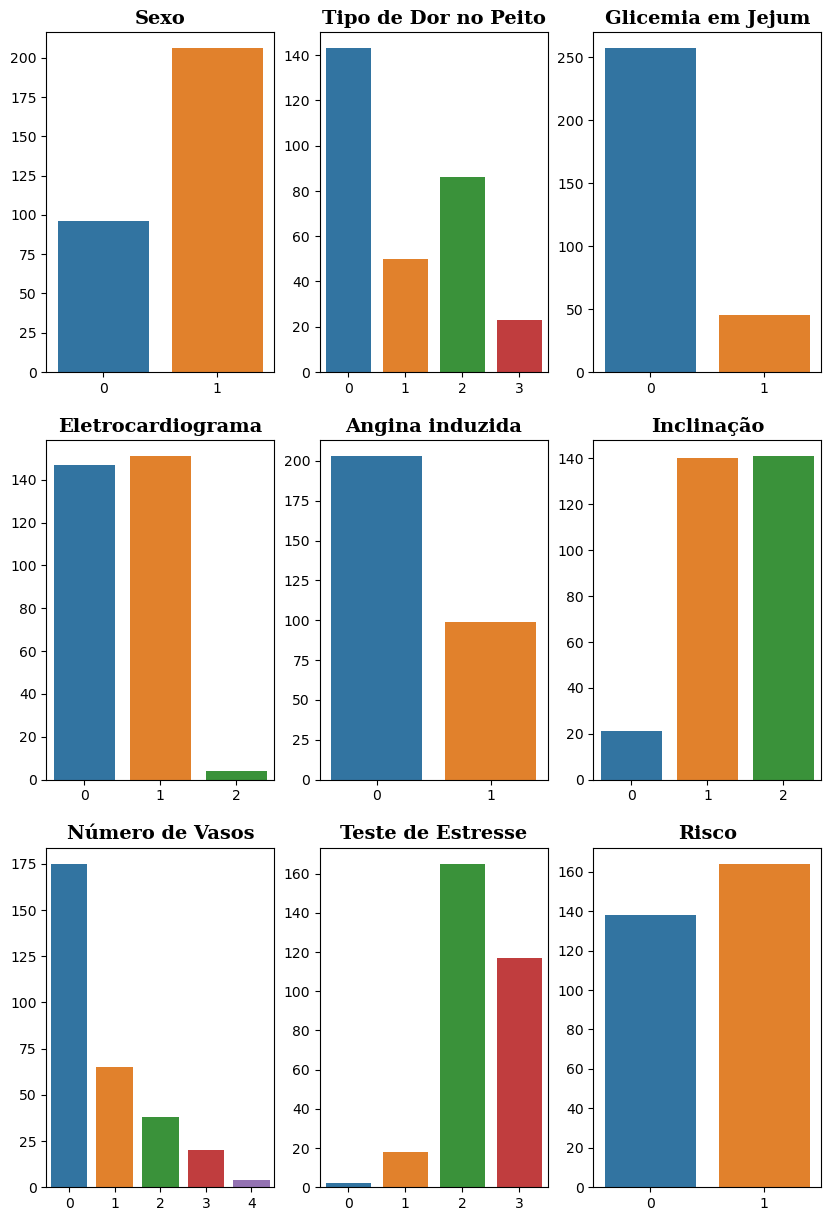

In [26]:
#Plot
countPlot(df_origin,colunas_categoricas,matriz=[3,3])

### Análise Bivariada

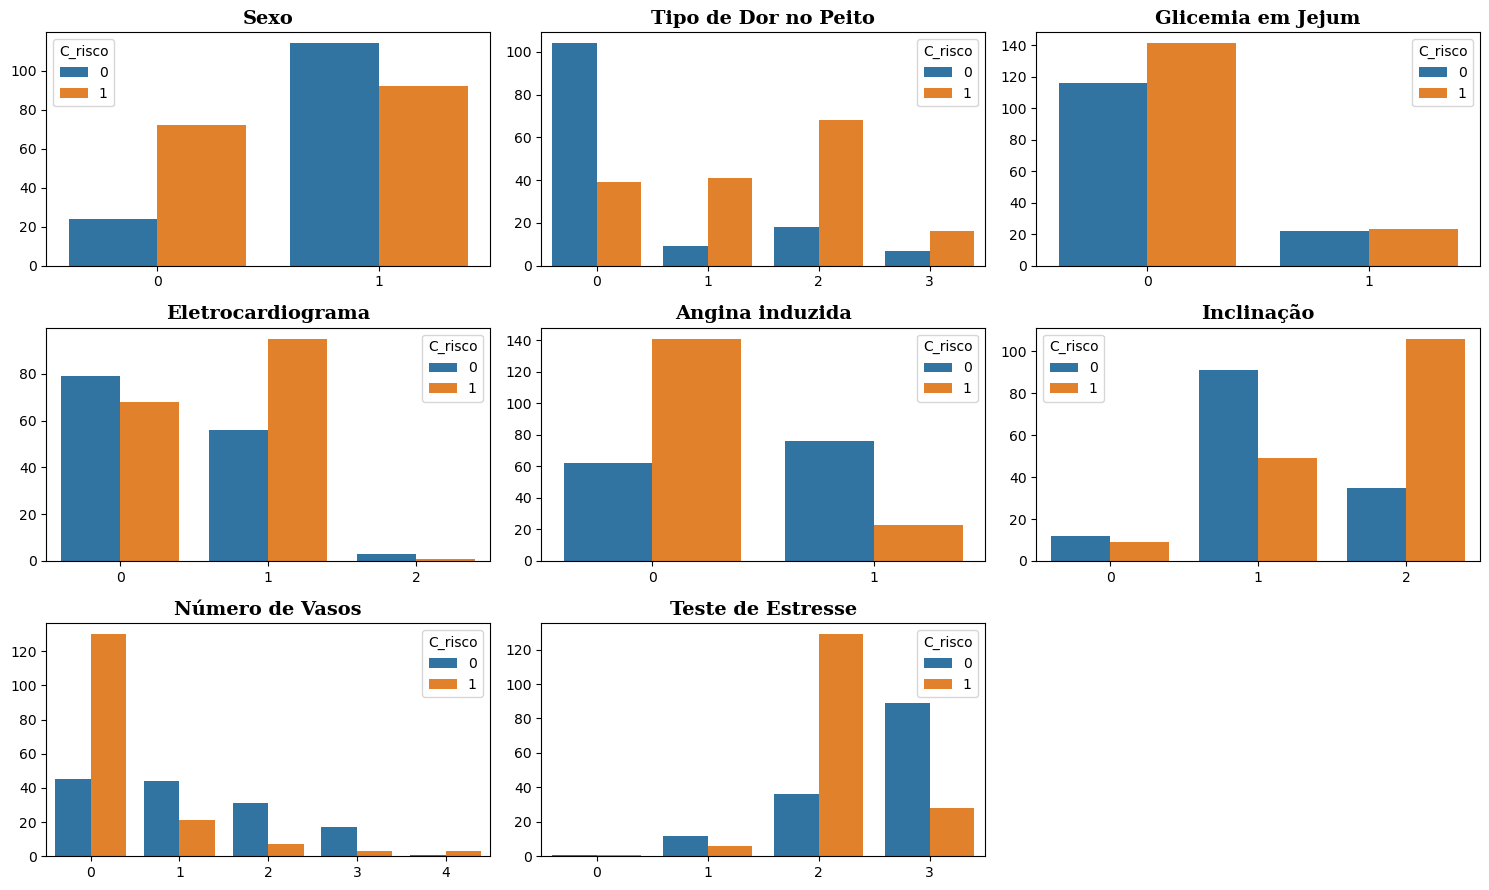

In [27]:
countPlotBiVariada(df_origin,colunas_categoricas,matriz=[3,3])

In [28]:
df_origin['C_t_estresse'].value_counts()

2    165
3    117
1     18
0      2
Name: C_t_estresse, dtype: int64

In [29]:
df_origin[df_origin['C_t_estresse']==0]['C_t_estresse'].value_counts()

0    2
Name: C_t_estresse, dtype: int64

Neste momento iremos desconsiderar a classe 0 da Coluna Teste de Estresse
apenas com dois registros, iremos considerar que tais registros não irão agregar valor para nossos modelos. 

In [30]:
df_origin.shape

(302, 14)

In [31]:
upper = df_origin.index[(df_origin['C_t_estresse']==0)].tolist() 
df_origin.drop(upper, inplace = True)
df_origin.shape

(300, 14)

## Distribuição Colunas Quantitativas

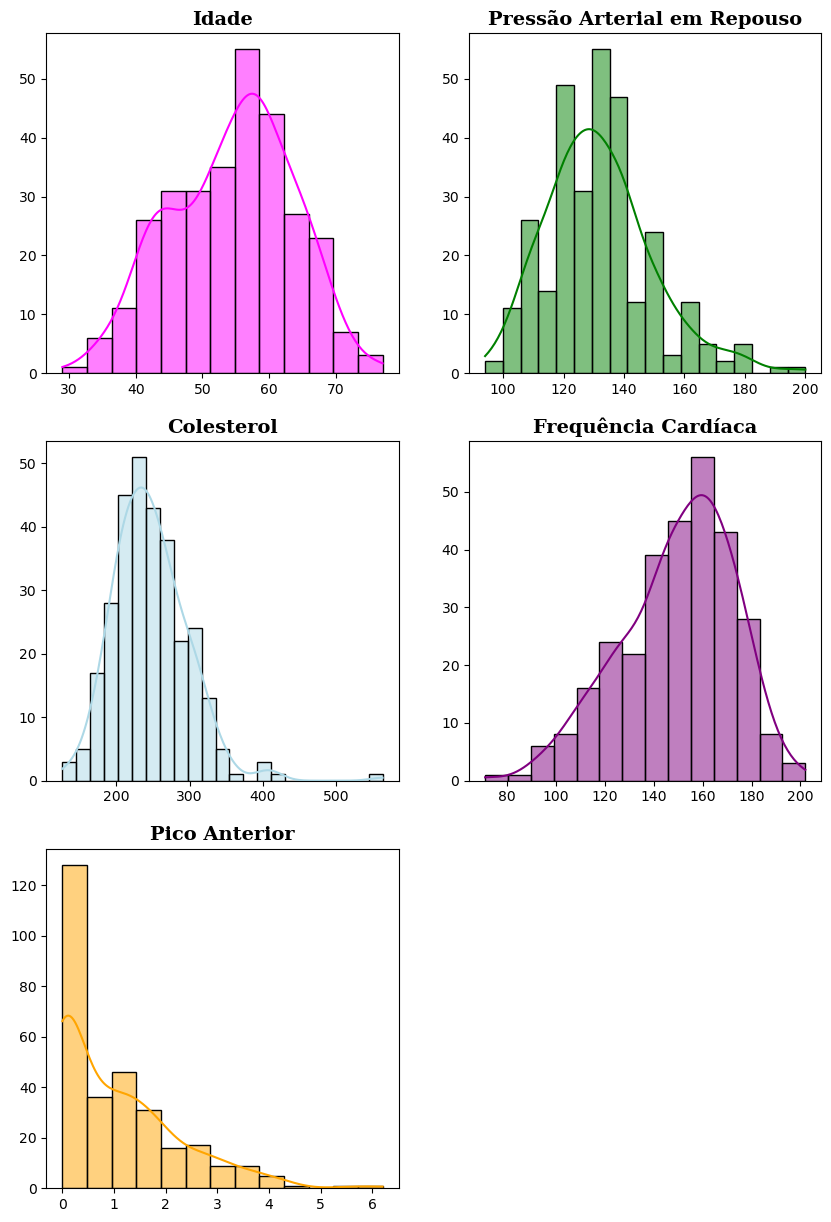

In [32]:
cor = ["magenta", "green", "lightblue", "purple", "orange"]
histplot(df_origin,colunas_quantitativas,listaCor=cor,matriz=[3,2])

### Correlação

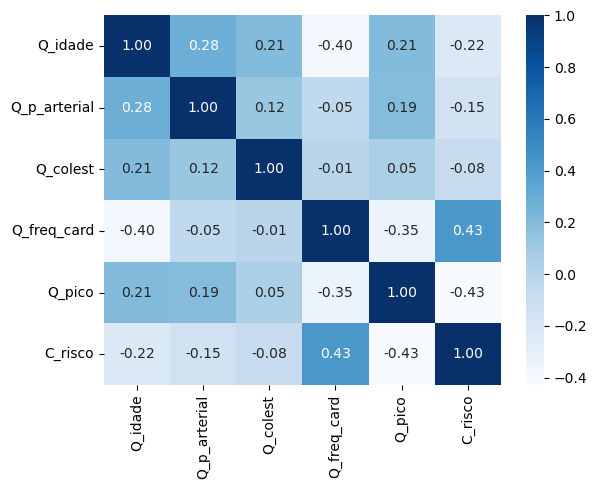

In [33]:
colums = colunas_quantitativas.copy()
colums.append(colunas_categoricas[-1])
sns.heatmap(df_origin[colums].corr(), cmap = 'Blues', annot = True, fmt = '.2f')
del colums

### Outliers

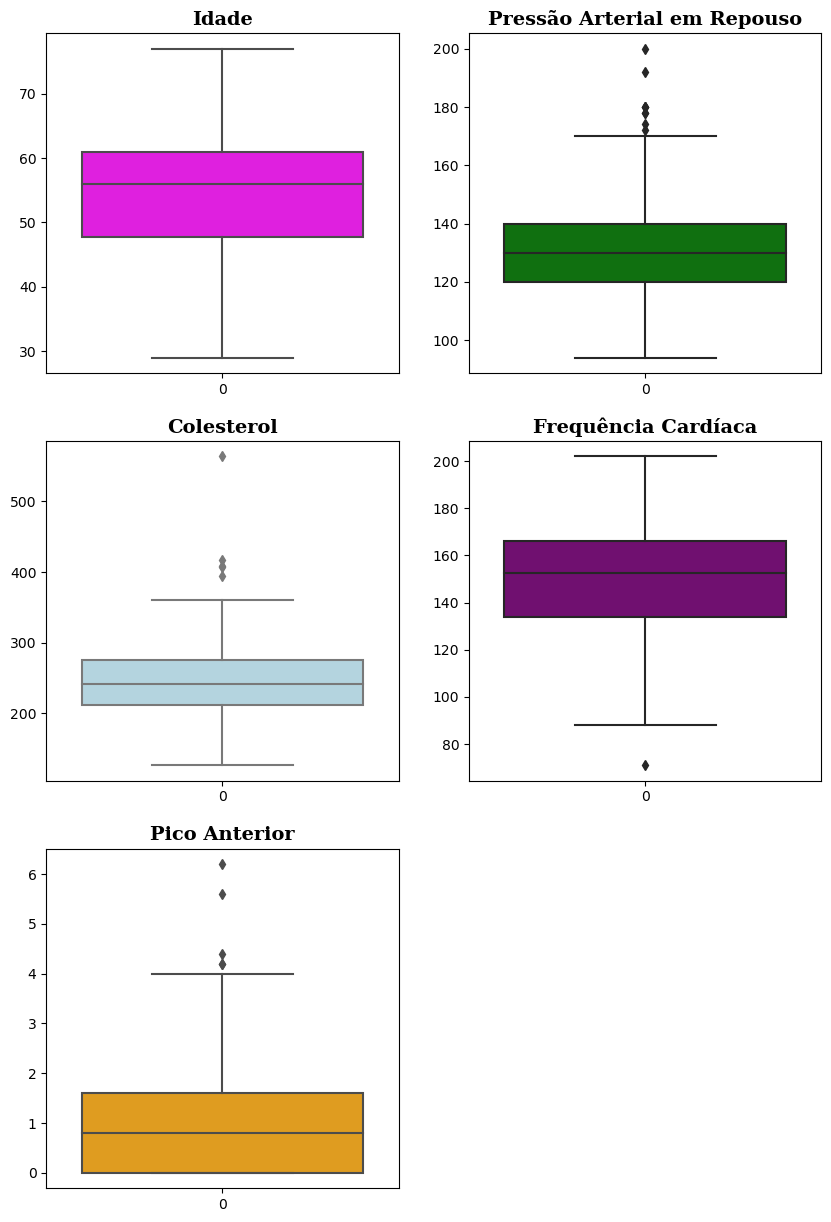

In [34]:
cor = ["magenta", "green", "lightblue", "purple", "orange"]
boxPlot(df_origin,colunas_quantitativas,listaCor=cor,matriz=[3,2])

 ### Contagem de frequência por valor

In [35]:
Column = colunas_quantitativas[1]
print("Avaliando frequência de outliers - ",dicionario[Column])

lim_super = df_origin[Column].mean() + (3 * df_origin[Column].std())
lim_inf = df_origin[Column].mean() - (3 * df_origin[Column].std())

print("Limite Superior ",lim_super )
print("Limite Inferior ",lim_inf )

lista_outliers = df_origin.index[(df_origin[Column]<=lim_inf) | (df_origin[Column]>=lim_super)].tolist()
df_origin[(df_origin[Column]<=lim_inf) | (df_origin[Column]>=lim_super)][Column].value_counts()

Avaliando frequência de outliers -  Pressão Arterial em Repouso
Limite Superior  184.48533732290954
Limite Inferior  78.76799601042379


200    1
192    1
Name: Q_p_arterial, dtype: int64

In [36]:
Column = colunas_quantitativas[2]
print("Avaliando frequência de outliers - ",dicionario[Column])

lim_super = df_origin[Column].mean() + (3 * df_origin[Column].std())
lim_inf = df_origin[Column].mean() - (3 * df_origin[Column].std())

print("Limite Superior ",lim_super )
print("Limite Inferior ",lim_inf )

lista_outliers = lista_outliers + df_origin.index[(df_origin[Column]<=lim_inf) | (df_origin[Column]>=lim_super)].tolist()
df_origin[(df_origin[Column]<=lim_inf) | (df_origin[Column]>=lim_super)][Column].value_counts()

Avaliando frequência de outliers -  Colesterol
Limite Superior  402.2558760315184
Limite Inferior  91.23079063514825


417    1
564    1
407    1
409    1
Name: Q_colest, dtype: int64

In [37]:
Column = colunas_quantitativas[3]
print("Avaliando frequência de outliers - ",dicionario[Column])

lim_super = df_origin[Column].mean() + (3 * df_origin[Column].std())
lim_inf = df_origin[Column].mean() - (3 * df_origin[Column].std())

print("Limite Superior ",lim_super )
print("Limite Inferior ",lim_inf )

#Lista de ouliers
lista_outliers = lista_outliers + df_origin.index[(df_origin[Column]<=lim_inf) | (df_origin[Column]>=lim_super)].tolist()
df_origin[(df_origin[Column]<=lim_inf) | (df_origin[Column]>=lim_super)][Column].value_counts()

Avaliando frequência de outliers -  Frequência Cardíaca
Limite Superior  218.33230735589345
Limite Inferior  80.9943593107732


71    1
Name: Q_freq_card, dtype: int64

In [38]:
Column = colunas_quantitativas[4]
print("Avaliando frequência de outliers - ",dicionario[Column])

lim_super = df_origin[Column].mean() + (3 * df_origin[Column].std())
lim_inf = df_origin[Column].mean() - (3 * df_origin[Column].std())

print("Limite Superior ",lim_super )
print("Limite Inferior ",lim_inf )

#Lista de ouliers
lista_outliers = lista_outliers + df_origin.index[(df_origin[Column]<=lim_inf) | (df_origin[Column]>=lim_super)].tolist()
df_origin[(df_origin[Column]<=lim_inf) | (df_origin[Column]>=lim_super)][Column].value_counts()

Avaliando frequência de outliers -  Pico Anterior
Limite Superior  4.5379458162527415
Limite Inferior  -2.444612482919408


6.2    1
5.6    1
Name: Q_pico, dtype: int64

In [39]:
lista_outliers

[223, 248, 28, 85, 220, 246, 272, 204, 221]

## Outras Relações

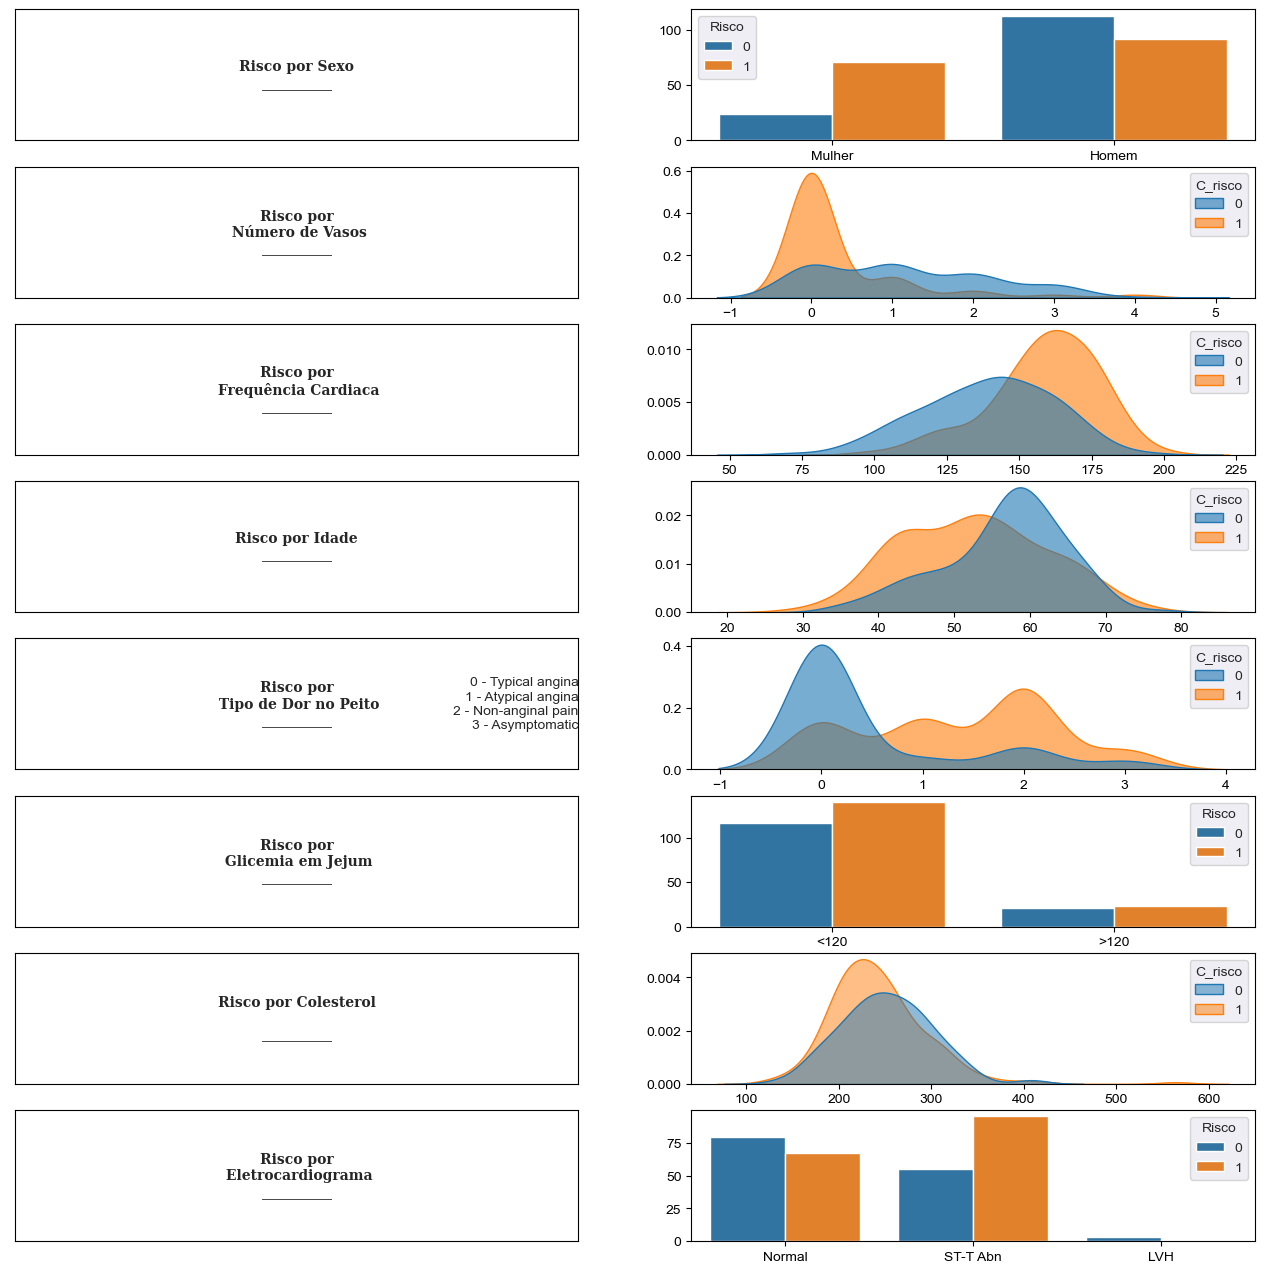

In [40]:
outrasvisoes()

# Pré-Processamento

## Eliminando outliers

In [41]:
df_origin.shape

(300, 14)

In [42]:
df_origin.drop(lista_outliers, inplace = True)

In [43]:
df_origin.shape

(291, 14)

## Engenharia de Atributos
Idade representará intervalos de dados 
- 0 Idoso - Maior 60
- 1 Adulto - 20-59 anos
- 2 Jovem - <=19

In [44]:
# Aplica a função 
df_origin['Q_idade'] = df_origin[colunas_quantitativas[0]].map(categoria_idade)

In [45]:
df_origin.rename(columns={'Q_idade': 'C_Faixa_Etaria'}, inplace=True)

In [46]:
def tratamento(df):
    df[]

,C_Faixa_Etaria,C_sexo,C_d_peito,Q_p_arterial,Q_colest,C_glic,C_eletro,Q_freq_card,C_angina,Q_pico,C_inclinacao,C_n_vasos,C_t_estresse,C_risco
0,0,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,1,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,1,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,1,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,1,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,0,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,1,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [47]:
dicionario.update({"C_Faixa_Etaria":"Faixa Etária"})

In [48]:
dicionario

{'Q_idade': 'Idade',
 'C_sexo': 'Sexo',
 'C_d_peito': 'Tipo de Dor no Peito',
 'Q_p_arterial': 'Pressão Arterial em Repouso',
 'Q_colest': 'Colesterol',
 'C_glic': 'Glicemia em Jejum',
 'C_eletro': 'Eletrocardiograma',
 'Q_freq_card': 'Frequência Cardíaca',
 'C_angina': 'Angina induzida',
 'Q_pico': 'Pico Anterior',
 'C_inclinacao': 'Inclinação',
 'C_n_vasos': 'Número de Vasos',
 'C_t_estresse': 'Teste de Estresse',
 'C_risco': 'Risco',
 'C_Faixa_Etaria': 'Faixa Etária'}

## Treino x Teste

In [49]:
#treino x Teste
X_train, X_test, y_train, y_test = treinoTeste(df=df_origin,target=colunas_categoricas[-1])


In [50]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(192, 13) (99, 13) (192,) (99,)


In [51]:
X_train.head()

,C_Faixa_Etaria,C_sexo,C_d_peito,Q_p_arterial,Q_colest,C_glic,C_eletro,Q_freq_card,C_angina,Q_pico,C_inclinacao,C_n_vasos,C_t_estresse
183,1,1,2,112,230,0,0,165,0,2.5,1,1,3
174,0,1,0,130,206,0,0,132,1,2.4,1,2,3
59,1,0,0,128,303,0,0,159,0,0.0,2,1,2
119,1,0,0,138,243,0,0,152,1,0.0,1,0,2
157,1,1,1,122,192,0,1,174,0,0.0,2,0,2


## Padronização

In [52]:
treino_mean = X_train.mean()
treino_std = X_train.std()
X_train = (X_train - treino_mean) / treino_std

In [53]:
X_train.head()

,C_Faixa_Etaria,C_sexo,C_d_peito,Q_p_arterial,Q_colest,C_glic,C_eletro,Q_freq_card,C_angina,Q_pico,C_inclinacao,C_n_vasos,C_t_estresse
183,0.648092,0.615881,0.937304,-1.077910,-0.306128,-0.437657,-1.085906,0.660047,-0.713544,1.422357,-0.606578,0.280469,1.140135
174,-1.534955,0.615881,-1.018809,-0.072985,-0.886161,-0.437657,-1.085906,-0.754722,1.394156,1.329752,-0.606578,1.259560,1.140135
59,0.648092,-1.615234,-1.018809,-0.184643,1.458137,-0.437657,-1.085906,0.402816,-0.713544,-0.892771,1.010963,0.280469,-0.556810
119,0.648092,-1.615234,-1.018809,0.373648,0.008056,-0.437657,-1.085906,0.102714,1.394156,-0.892771,-0.606578,-0.698622,-0.556810
157,0.648092,0.615881,-0.040752,-0.519619,-1.224513,-0.437657,0.844594,1.045893,-0.713544,-0.892771,1.010963,-0.698622,-0.556810


In [54]:
#Padronizar dados teste
X_test.head()

,C_Faixa_Etaria,C_sexo,C_d_peito,Q_p_arterial,Q_colest,C_glic,C_eletro,Q_freq_card,C_angina,Q_pico,C_inclinacao,C_n_vasos,C_t_estresse
87,1,1,1,101,197,1,1,156,0,0.0,2,0,3
269,1,1,0,130,283,1,0,103,1,1.6,0,0,3
46,1,1,2,140,235,0,0,180,0,0.0,2,0,2
180,1,1,0,132,353,0,1,132,1,1.2,1,1,3
146,1,0,2,118,242,0,1,149,0,0.3,1,1,2


In [55]:
X_test = (X_test - treino_mean) / treino_std

In [56]:
X_test.head()

,C_Faixa_Etaria,C_sexo,C_d_peito,Q_p_arterial,Q_colest,C_glic,C_eletro,Q_freq_card,C_angina,Q_pico,C_inclinacao,C_n_vasos,C_t_estresse
87,0.648092,0.615881,-0.040752,-1.692031,-1.103673,2.272993,0.844594,0.274201,-0.713544,-0.892771,1.010963,-0.698622,1.140135
269,0.648092,0.615881,-1.018809,-0.072985,0.974777,2.272993,-1.085906,-1.998003,1.394156,0.588911,-2.224119,-0.698622,1.140135
46,0.648092,0.615881,0.937304,0.485307,-0.185288,-0.437657,-1.085906,1.303123,-0.713544,-0.892771,1.010963,-0.698622,-0.556810
180,0.648092,0.615881,-1.018809,0.038673,2.666538,-0.437657,0.844594,-0.754722,1.394156,0.218490,-0.606578,0.280469,1.140135
146,0.648092,-1.615234,0.937304,-0.742935,-0.016112,-0.437657,0.844594,-0.025902,-0.713544,-0.614956,-0.606578,0.280469,-0.556810


# Treinamentos

## Instâncias dos Modelos 

In [57]:
lRegre = LogisticRegression()
dTree = DecisionTreeClassifier()
knn = KNeighborsClassifier()
svm = SVC()
rForest = RandomForestClassifier()

## Regressão Logística

In [58]:
%%time

lRegre_model = gridSearch(lRegre,dic_Hyperparameter['lRegre'])
lRegre_model.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
CPU times: total: 391 ms
Wall time: 6.83 s


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='accuracy', verbose=True)

In [59]:
lRegre_model.best_estimator_

LogisticRegression(C=0.01)

In [60]:
lRegre_model.best_score_

0.7921727395411606

In [98]:
lRegre_model.best_params_

{'C': 0.01, 'penalty': 'l2'}

      Normalized Confusion Matrix


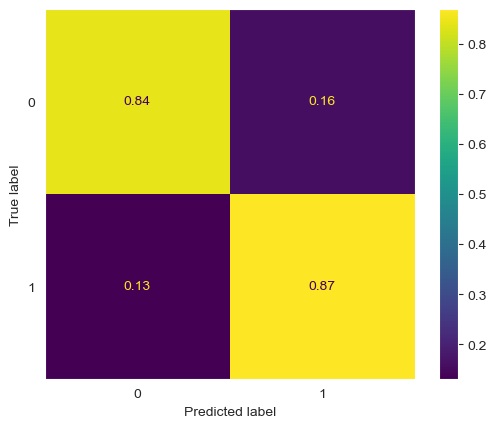

--------------------------------------------------

Macro F1:  0.8519230769230769
Micro F1:  0.8585858585858586
Weighted F1:  0.8592204092204092
F1: [0.82051282 0.88333333]
--------------------------------------------------
Macro Recall:  0.855478861087144
Micro Recall:  0.8585858585858586
Weighted Recall:  0.8585858585858586
Recall: [0.84210526 0.86885246]
--------------------------------------------------
Macro Precision:  0.8491525423728814
Micro Precision:  0.8585858585858586
Weighted Precision:  0.8605718198938539
Precision: [0.8        0.89830508]
--------------------------------------------------
False Positive Rate:  0.15789473684210525
--------------------------------------------------

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        38
           1       0.90      0.87      0.88        61

    accuracy                           0.86        99
   macro avg       0.85      0.86      0.85        99
weighted avg       0.86

In [61]:
metricas(lRegre_model,X_test,y_test,matrizModel=1)

## KNN

In [62]:
%%time
knn_model = gridSearch(knn,dic_Hyperparameter['knn'])
knn_model.fit(X_train,y_train)

Fitting 5 folds for each of 900 candidates, totalling 4500 fits
CPU times: total: 4.38 s
Wall time: 50.6 s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['kd_tree', 'ball_tree', 'brute'],
                         'leaf_size': [3, 5, 10, 20, 30],
                         'metric': ['euclidean', 'manhattan', 'chebyshev'],
                         'n_neighbors': [3, 5, 10, 20, 30], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='accuracy', verbose=True)

In [63]:
knn_model.best_score_

0.797570850202429

In [97]:
knn_model.best_params_

{'algorithm': 'kd_tree',
 'leaf_size': 3,
 'metric': 'manhattan',
 'n_neighbors': 10,
 'p': 1,
 'weights': 'uniform'}

      Normalized Confusion Matrix


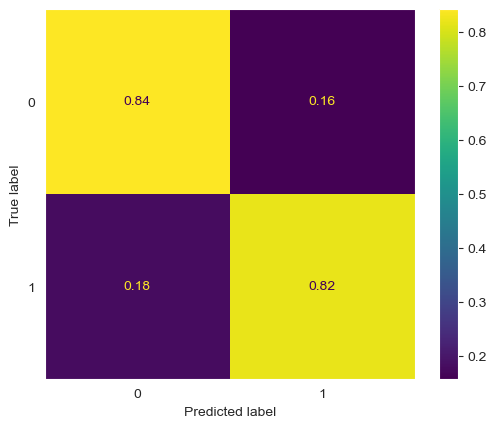

--------------------------------------------------

Macro F1:  0.8224121557454891
Micro F1:  0.8282828282828283
Weighted F1:  0.8299135706543115
F1: [0.79012346 0.85470085]
--------------------------------------------------
Macro Recall:  0.8308886971527178
Micro Recall:  0.8282828282828283
Weighted Recall:  0.8282828282828283
Recall: [0.84210526 0.81967213]
--------------------------------------------------
Macro Precision:  0.8185215946843853
Micro Precision:  0.8282828282828283
Weighted Precision:  0.8357914695123998
Precision: [0.74418605 0.89285714]
--------------------------------------------------
False Positive Rate:  0.15789473684210525
--------------------------------------------------

              precision    recall  f1-score   support

           0       0.74      0.84      0.79        38
           1       0.89      0.82      0.85        61

    accuracy                           0.83        99
   macro avg       0.82      0.83      0.82        99
weighted avg       0.8

In [64]:
metricas(knn_model,X_test,y_test,matrizModel=1)

## SVM

In [65]:
%%time

svm_model = gridSearch(svm,dic_Hyperparameter['svm'])
svm_model.fit(X_train,y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
CPU times: total: 2.23 s
Wall time: 1min 13s


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'degree': [2, 3, 4, 5],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'linear']},
             return_train_score=True, scoring='accuracy', verbose=True)

In [66]:
svm_model.best_score_

0.7869095816464238

In [95]:
svm_model.best_params_

{'C': 100, 'degree': 2, 'gamma': 0.0001, 'kernel': 'rbf'}

      Normalized Confusion Matrix


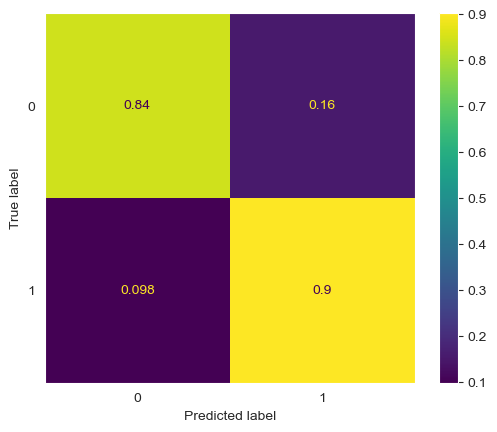

--------------------------------------------------

Macro F1:  0.8718723037100949
Micro F1:  0.8787878787878788
Weighted F1:  0.8787878787878788
F1: [0.84210526 0.90163934]
--------------------------------------------------
Macro Recall:  0.8718723037100948
Micro Recall:  0.8787878787878788
Weighted Recall:  0.8787878787878788
Recall: [0.84210526 0.90163934]
--------------------------------------------------
Macro Precision:  0.8718723037100948
Micro Precision:  0.8787878787878788
Weighted Precision:  0.8787878787878788
Precision: [0.84210526 0.90163934]
--------------------------------------------------
False Positive Rate:  0.15789473684210525
--------------------------------------------------

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        38
           1       0.90      0.90      0.90        61

    accuracy                           0.88        99
   macro avg       0.87      0.87      0.87        99
weighted avg       0.8

In [88]:
metricas(svm_model,X_test,y_test,matrizModel=1)

## Decision Tree

In [68]:
%%time

dTree_model = gridSearch(dTree,dic_Hyperparameter['dTree'])
dTree_model.fit(X_train,y_train)


Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
CPU times: total: 5.56 s
Wall time: 25.5 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [3, 5, 7, 9],
                         'min_samples_split': [2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             return_train_score=True, scoring='accuracy', verbose=True)

In [69]:
dTree_model.best_score_

0.7865047233468286

In [93]:
dTree_model.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_leaf': 7,
 'min_samples_split': 3,
 'splitter': 'random'}

      Normalized Confusion Matrix


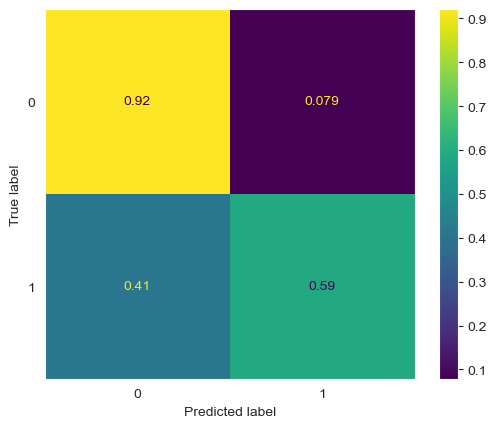

--------------------------------------------------

Macro F1:  0.7171428571428572
Micro F1:  0.7171717171717171
Weighted F1:  0.7178066378066378
F1: [0.71428571 0.72      ]
--------------------------------------------------
Macro Recall:  0.7556082830025884
Micro Recall:  0.7171717171717171
Weighted Recall:  0.7171717171717171
Recall: [0.92105263 0.59016393]
--------------------------------------------------
Macro Precision:  0.7532051282051282
Micro Precision:  0.7171717171717171
Weighted Precision:  0.7926702926702927
Precision: [0.58333333 0.92307692]
--------------------------------------------------
False Positive Rate:  0.07894736842105263
--------------------------------------------------

              precision    recall  f1-score   support

           0       0.58      0.92      0.71        38
           1       0.92      0.59      0.72        61

    accuracy                           0.72        99
   macro avg       0.75      0.76      0.72        99
weighted avg       0.7

In [90]:
metricas(dTree_model,X_test,y_test,matrizModel=1)

## Random Forest

In [71]:
rForest_model = gridSearch(rForest,dic_Hyperparameter['rForest'])
rForest_model.fit(X_train,y_train)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [2, 4, 6, 8, 10],
                         'max_features': ['auto', 'sqtr'],
                         'min_samples_leaf': [3, 5, 7, 8, 9],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [30, 40, 50, 75]},
             return_train_score=True, scoring='accuracy', verbose=True)

In [72]:
rForest_model.best_score_

0.8232118758434549

In [94]:
rForest_model.best_params_

{'bootstrap': True,
 'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 7,
 'min_samples_split': 2,
 'n_estimators': 30}

      Normalized Confusion Matrix


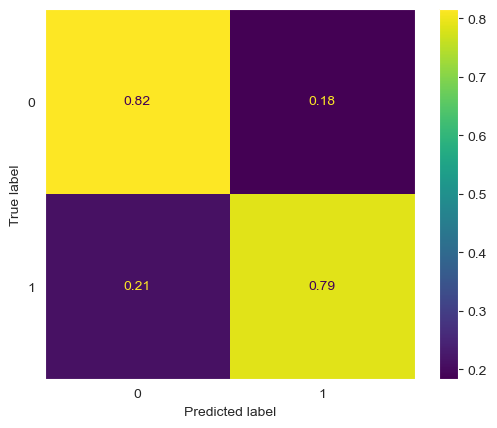

--------------------------------------------------

Macro F1:  0.7918418839360808
Micro F1:  0.7979797979797979
Weighted F1:  0.8001461205834629
F1: [0.75609756 0.82758621]
--------------------------------------------------
Macro Recall:  0.801337359792925
Micro Recall:  0.797979797979798
Weighted Recall:  0.797979797979798
Recall: [0.81578947 0.78688525]
--------------------------------------------------
Macro Precision:  0.7886363636363636
Micro Precision:  0.797979797979798
Weighted Precision:  0.8081726354453627
Precision: [0.70454545 0.87272727]
--------------------------------------------------
False Positive Rate:  0.18421052631578946
--------------------------------------------------

              precision    recall  f1-score   support

           0       0.70      0.82      0.76        38
           1       0.87      0.79      0.83        61

    accuracy                           0.80        99
   macro avg       0.79      0.80      0.79        99
weighted avg       0.81   

In [73]:
metricas(rForest_model,X_test,y_test,matrizModel=1)

# Conclusão

- Como podemos observar, a matriz de confusão do modelo SVM foi a que apresentou o menor valor de falso positivo. Entendemos que, para o problema levantado, a classificação de ataques cardíacos, o melhor modelo seria aquele que apresentasse um menor percentual de erro da classe 1, já que, mesmo o modelo classificando um indivíduo da classe 0 como classe 1, tal erro não tem o mesmo impacto que classificar um indivíduo da classe 1 como classe 0. Nessa segunda hipótese, o modelo estaria condenando o paciente, dizendo que ele tem poucas chances de ter um infarto, o que não é verdade.
- Podemos concluir que a aplicação de técnicas de aprendizagem de máquina no âmbito da saúde pode ser uma ferramenta valiosa para auxiliar na prevenção e tratamento de doenças. No caso específico deste projeto, a utilização do modelo SVM se mostrou a melhor opção para prever a predisposição de uma pessoa a sofrer um ataque cardíaco, devido ao seu baixo índice de falso positivo. 
- Entretanto, é importante ressaltar que esse é apenas um projeto experimental e que ainda é necessário realizar mais estudos e pesquisas para validar a eficácia dessas técnicas em projetos reais e ampliar a sua aplicabilidade na saúde. A aplicação de técnicas de aprendizado de máquina no âmbito da saúde ainda é um assunto muito discutido no mundo, quanto a questões éticas, morais e legais.

